In [1]:
import matplotlib.pyplot as plt
import torch

In [2]:
# Example from https://d2l.ai/chapter_optimization/momentum.html

# Try playing around with different coefficents

def loss_func(x1, x2):
    a1 = 0.5
    a2 = 1
    return (a1 * x1 ** 2) + (a2 * x2 ** 2)

In [3]:
extent = 4

x1list = torch.linspace(-extent, extent, 100)
x2list = torch.linspace(-extent, extent, 100)

x1grid, x2grid = torch.meshgrid(x1list, x2list)

loss_grid = loss_func(x1grid, x2grid)

x1grid, x2grid, loss_grid

(tensor([[-4.0000, -4.0000, -4.0000,  ..., -4.0000, -4.0000, -4.0000],
         [-3.9192, -3.9192, -3.9192,  ..., -3.9192, -3.9192, -3.9192],
         [-3.8384, -3.8384, -3.8384,  ..., -3.8384, -3.8384, -3.8384],
         ...,
         [ 3.8384,  3.8384,  3.8384,  ...,  3.8384,  3.8384,  3.8384],
         [ 3.9192,  3.9192,  3.9192,  ...,  3.9192,  3.9192,  3.9192],
         [ 4.0000,  4.0000,  4.0000,  ...,  4.0000,  4.0000,  4.0000]]),
 tensor([[-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         ...,
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000]]),
 tensor([[24.0000, 23.3601, 22.7332,  ..., 22.7332, 23.3601, 24.0000],
         [23.6800, 23.0401, 22.4132,  ..., 22

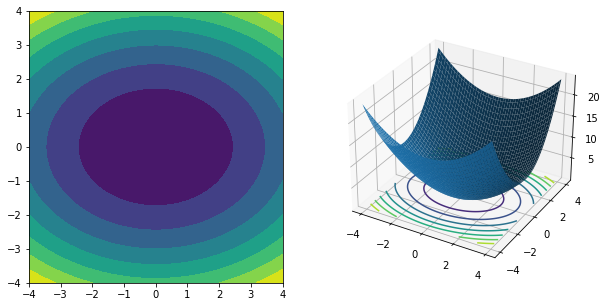

In [4]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 2, 1)
ax.contourf(x1grid, x2grid, loss_grid)

ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.plot_surface(x1grid.numpy(), x2grid.numpy(), loss_grid.numpy())
ax.contour(x1grid, x2grid, loss_grid, zdir='z', offset=0);

In [5]:
parameters = torch.rand(2) * 8 - 4
parameters

tensor([ 3.2407, -2.2112])

# Gradient Descent

$$
θ_{t+1} = θ_t - η \nabla L(\hat y, y)
$$

In [6]:
# Mini-batch SGD

parameters = torch.tensor([3.0, 3.0], requires_grad=True)

# Try 0.1, 0.4, 0.5, and 0.6
learning_rate = 0.4
num_epochs = 10

phistory = [parameters.detach().clone()]
lhistory = [0]

for epoch in range(num_epochs):

    # Compute loss/cost and gradients
    parameters.grad = None
    loss = loss_func(parameters[0], parameters[1])
    loss.backward()
    
    print(loss.item())
    
    # Update parameters
    with torch.no_grad():
        parameters -= learning_rate * parameters.grad
    
    phistory.append(parameters.detach().clone())
    lhistory.append(loss.item())

13.5
1.9799997806549072
0.5975999236106873
0.21052797138690948
0.07560574263334274
0.027210695669054985
0.009795554913580418
0.0035263875033706427
0.001269499072805047
0.00045701960334554315


In [7]:
phistory

[tensor([3., 3.]),
 tensor([1.8000, 0.6000]),
 tensor([1.0800, 0.1200]),
 tensor([0.6480, 0.0240]),
 tensor([0.3888, 0.0048]),
 tensor([0.2333, 0.0010]),
 tensor([0.1400, 0.0002]),
 tensor([8.3981e-02, 3.8400e-05]),
 tensor([5.0388e-02, 7.6800e-06]),
 tensor([3.0233e-02, 1.5360e-06]),
 tensor([1.8140e-02, 3.0720e-07])]

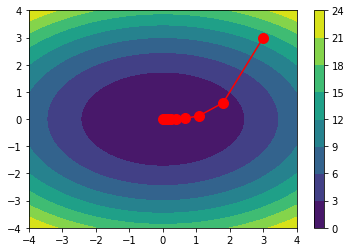

In [8]:
loss_grid = loss_func(x1grid, x2grid)

cplot = plt.contourf(x1grid, x2grid, loss_grid)
plt.colorbar(cplot)

x1 = [p[0].item() for p in phistory]
x2 = [p[1].item() for p in phistory]

plt.plot(x1, x2, color='red', marker='o', markersize=10);

# Gradient Descent with Momentum

Initial condition:
$$
v_0 = 0
$$

General case:

$$
\begin{align}
v_{t+1} &= β v_t + (1 - β) \nabla L(\hat y, y) \\
θ_{t+1} &= θ_t - η v_{t+1}
\end{align}
$$

In [9]:
# Mini-batch SGD with momentum

parameters = torch.tensor([3.0, 3.0], requires_grad=True)
momentum = torch.zeros_like(parameters)

# Hyperparameters
learning_rate = 0.8
num_epochs = 10
beta = 0.9

phistory_mo = [parameters.detach().clone()]
lhistory_mo = [0]

for epoch in range(num_epochs):

    # Compute loss/cost and gradients
    parameters.grad = None
    loss = loss_func(parameters[0], parameters[1])
    loss.backward()
    
    print(loss.item())
    
    # Update parameters
    with torch.no_grad():
        
        # Compute momentum
        momentum = beta * momentum + (1 - beta) * parameters.grad
        parameters -= learning_rate * momentum
    
    phistory_mo.append(parameters.detach().clone())
    lhistory_mo.append(loss.item())

13.5
10.159199714660645
5.537179946899414
1.961459755897522
0.7179582118988037
1.5855538845062256
3.3011209964752197
4.498431205749512
4.4901628494262695
3.483884334564209


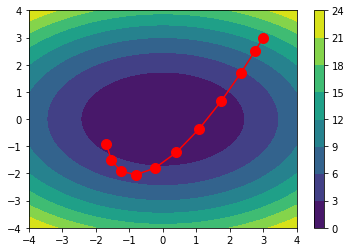

In [10]:
loss_grid = loss_func(x1grid, x2grid)

cplot = plt.contourf(x1grid, x2grid, loss_grid)
plt.colorbar(cplot)

x1 = [p[0].item() for p in phistory_mo]
x2 = [p[1].item() for p in phistory_mo]

plt.plot(x1, x2, color='red', marker='o', markersize=10);

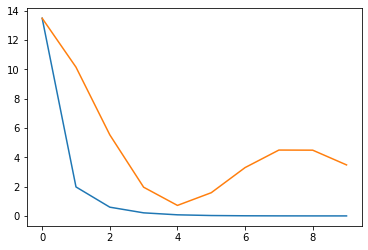

In [11]:
plt.plot(lhistory[1:])
plt.plot(lhistory_mo[1:]);

# Exponential Averaging

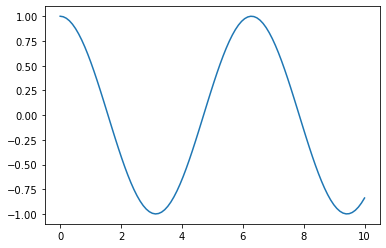

In [12]:
x = torch.linspace(0, 10, 100)
y = torch.cos(x)

plt.plot(x, y);

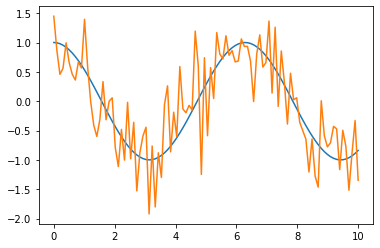

In [21]:
ynoisy = torch.cos(x) + torch.randn_like(x) * 0.5

plt.plot(x, y);
plt.plot(x, ynoisy);

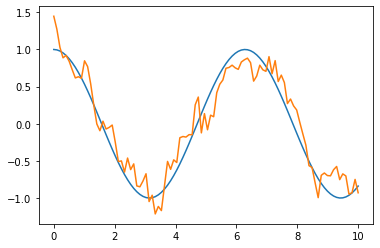

In [22]:
# Without correction (we are doubling the first value!)

beta = 0.7

ysmooth = [ynoisy[0]]
for yval in ynoisy[1:]:
    ysmooth.append(beta * ysmooth[-1] + (1 - beta) * yval)

plt.plot(x, y);
plt.plot(x, ysmooth);

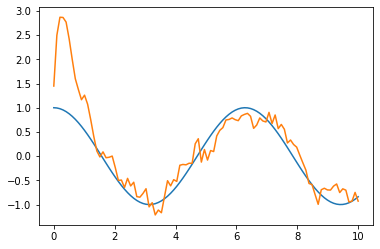

In [23]:
# With correction (we are doubling the first value!)

beta = 0.7

ysmooth = [0]
y_prev = ysmooth[0]
t = 1
for yval in ynoisy:
    newy = beta * ysmooth[-1] + (1 - beta) * yval
    ysmooth.append(newy / (1 - beta ** t))
    t += 1

plt.plot(x, y);
plt.plot(x, ysmooth[1:]);